In [1]:
import os
from stop_words import get_stop_words
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WordPunctTokenizer
import pandas as pd
import re
#import unidecode
import unicodedata


In [2]:
hashtag_list= []
directory = os.path.join(".","agg_data/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            print root+'/'+file
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            text_part = []
            for txt in df['TEXT']:
                lst_hshth = re.findall(r"#(\w+)", txt.lower()),
                hashtag_list.extend(lst_hshth)
    print len(hashtag_list)

0
0
./agg_data/2016/08/20160812.csv
./agg_data/2016/08/20160831.csv
./agg_data/2016/08/20160806.csv
./agg_data/2016/08/20160829.csv
./agg_data/2016/08/20160830.csv
./agg_data/2016/08/20160820.csv
./agg_data/2016/08/20160804.csv
./agg_data/2016/08/20160803.csv
./agg_data/2016/08/20160801.csv
./agg_data/2016/08/20160824.csv
./agg_data/2016/08/20160828.csv
./agg_data/2016/08/20160822.csv
./agg_data/2016/08/20160810.csv
./agg_data/2016/08/20160818.csv
./agg_data/2016/08/20160808.csv
./agg_data/2016/08/20160811.csv
./agg_data/2016/08/20160816.csv
./agg_data/2016/08/20160809.csv
./agg_data/2016/08/20160827.csv
./agg_data/2016/08/20160821.csv
./agg_data/2016/08/20160825.csv
./agg_data/2016/08/20160823.csv
./agg_data/2016/08/20160805.csv
./agg_data/2016/08/20160814.csv
./agg_data/2016/08/20160819.csv
./agg_data/2016/08/20160807.csv
./agg_data/2016/08/20160802.csv
./agg_data/2016/08/20160817.csv
./agg_data/2016/08/20160815.csv
./agg_data/2016/08/20160826.csv
./agg_data/2016/08/20160813.csv
1511

In [3]:
dict_df = {}
directory = os.path.join(".","agg_data/")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            print root+'/'+file
            df = pd.read_csv(root+'/'+file,sep='\t',encoding='utf-8')
            text_part = []
            for i in range(len(df.index)):
                lst_hshth = re.findall(r"#(\w+)", df.iloc[i:i+1,7:8].to_string().lower())
                for hsh in lst_hshth:
                    hsh_normal = unicodedata.normalize('NFKD', unicode(hsh)).encode('ASCII', 'ignore')
                    if hsh_normal in dict_df:
                        dict_df[hsh_normal]=pd.concat([dict_df[hsh_normal],df.iloc[[i]]])
                        #print df.iloc[[i]]
                        #print type(df.iloc[i,:])
                    else:
                        dict_df[hsh_normal] = df.iloc[[i]]
    print len(dict_df)

0
0
./agg_data/2016/08/20160812.csv
./agg_data/2016/08/20160831.csv
./agg_data/2016/08/20160806.csv
./agg_data/2016/08/20160829.csv
./agg_data/2016/08/20160830.csv
./agg_data/2016/08/20160820.csv
./agg_data/2016/08/20160804.csv
./agg_data/2016/08/20160803.csv
./agg_data/2016/08/20160801.csv
./agg_data/2016/08/20160824.csv
./agg_data/2016/08/20160828.csv
./agg_data/2016/08/20160822.csv
./agg_data/2016/08/20160810.csv
./agg_data/2016/08/20160818.csv
./agg_data/2016/08/20160808.csv
./agg_data/2016/08/20160811.csv
./agg_data/2016/08/20160816.csv
./agg_data/2016/08/20160809.csv
./agg_data/2016/08/20160827.csv
./agg_data/2016/08/20160821.csv
./agg_data/2016/08/20160825.csv
./agg_data/2016/08/20160823.csv
./agg_data/2016/08/20160805.csv
./agg_data/2016/08/20160814.csv
./agg_data/2016/08/20160819.csv
./agg_data/2016/08/20160807.csv
./agg_data/2016/08/20160802.csv
./agg_data/2016/08/20160817.csv
./agg_data/2016/08/20160815.csv
./agg_data/2016/08/20160826.csv
./agg_data/2016/08/20160813.csv
1105

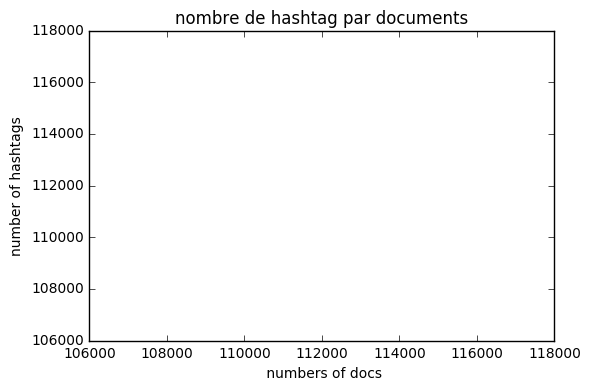

In [21]:
import matplotlib.pyplot as plt
nbr_tweet = len(dict_df.values())
hash_ = len(dict_df.keys())
plt.xlabel (" numbers of docs")
plt.ylabel("number of hashtags")
#plt.legend([cat.decode('utf-8')],loc='best')
plt.title('nombre de hashtag par documents')
plt.plot(nbr_tweet,hash_) 
plt.show()


In [24]:
#seuil 
seuil = 3

for key, value in dict_df.items():
    if len(value.values)> seuil:
        value.to_csv("./out/"+key+".csv",encoding='utf-8',sep='\t',index=None)
    
# to move one row from df2 to df1, use .loc to enlarge df1
# this is far more efficient than pd.concat and pd.append
